
**Oppgave 1**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
f_x = np.array([0.05,0.10,0.25,0.40,0.15,0.05])
F_x = [np.sum(f_x[:i]) for i in range(1,7)]

def simX(n):
    x = np.arange(6)
    x_sim = np.zeros(n)
    for i in range(n): 
        u = np.random.uniform()
        if u < F_x[0]:
            x_sim[i] = x[0]
        elif u <= F_x[1]:
            x_sim[i] = x[1]
        elif u <= F_x[2]:
            x_sim[i] = x[2]
        elif u <= F_x[3]:
            x_sim[i] = x[3]
        elif u <= F_x[4]:
            x_sim[i] = x[4]
        elif u > F_x[4]:
            x_sim[i] = x[5]
    return x_sim

In [ ]:
n = 1000

x = np.array(simX(n))
P_X_le_2 = (np.count_nonzero(x <= 2)+n-np.count_nonzero(x))/n
print("Approksimert sannsynlighet: ",P_X_le_2)
print("Teoretisk sannsynlighet: ",np.sum(f_x[:3]))

**Oppgave 2**


In [ ]:
E_x = round(sum([i*val for i, val in enumerate(f_x)]), 2)
print(f"Utregnet forventningsverdi: {E_x}")
print(f"Approksimert forventningsverdi: {sum(x)*(1/n)}")
print('')
Var_x = round(sum([(i - E_x)**2 * val for i, val in enumerate(f_x)]), 2)
print(f"Utregnet varians: {Var_x}")
print(f"Approksimert varians: {sum([(i-E_x)**2 for i in x])*(1/n)}")
print('')
print(f"Utregnet standardavik: {round(np.sqrt(Var_x), 2)}")
print(f"Approksimert standardavik: {np.sqrt(sum([(i-E_x)**2 for i in x])*(1/n))}")

**Oppgave 3**

In [14]:
def generateX(n, a=1):
    u = np.random.uniform(size=n)
    x = np.sqrt(-a*np.log(1-u))
    return x

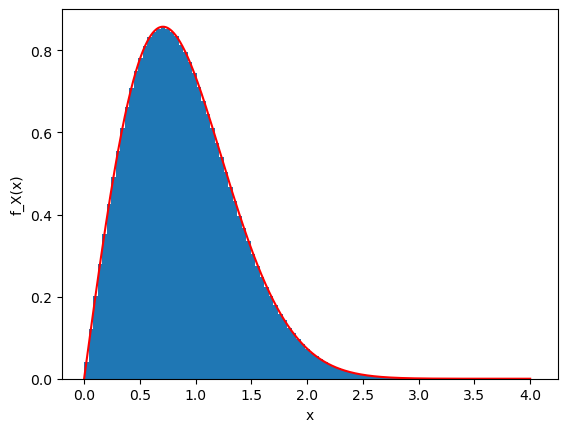

In [29]:
n = 10_000_000
a = 1
sim_X = generateX(n, a)

f_X = lambda x: 2*x/a*np.exp(-x**2/a)
x = np.linspace(0, 4, 1000)
y = f_X(x)
plt.hist(sim_X, bins=100, density=True)
plt.plot(x, y, 'r') 

plt.xlabel('x')
plt.ylabel('f_X(x)')
plt.show()

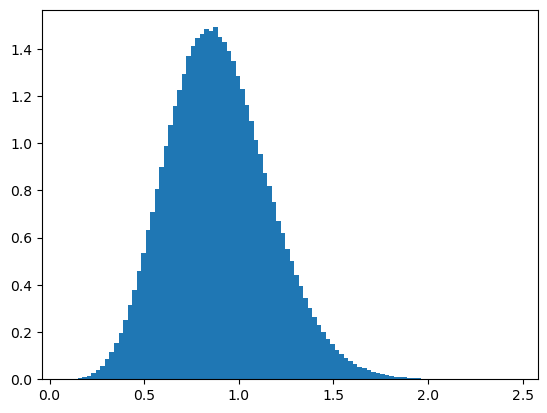

In [35]:
n = 1_000_000

x_1 = generateX(n)
x_2 = generateX(n)
x_3 = generateX(n, a=1.2)
x_4 = generateX(n, a=1.2)
x_5 = generateX(n, a=1.2)
y = np.array([sorted([x_1[i], x_2[i], x_3[i], x_4[i], x_5[i]])[2] for i in range(n)])
plt.hist(y, bins=100, density=True)
plt.show()

In [42]:
P_1 = np.count_nonzero(y > 1) / n
print(f'Sannsynligheten for at Y > 1 er {P_1}')

P_2 = np.count_nonzero(y < 0.75) / np.count_nonzero(y > 0.75)
print(f'Sannsynligheten for at Y > 1 gitt Y > 0.75 er {P_2}')

Sannsynligheten for at Y > 1 er 0.331556
Sannsynligheten for at Y > 1 gitt Y > 0.75 er 0.4514083014749211


In [46]:
print(f'{sum(y)/n} er forventningsverdien til Y')
print(f'{np.std(y)} er standardaviket til Y')

0.8958338390406136 er forventningsverdien til Y
0.26864322440416405 er variansen til Y
0.07216918201826604 er standardavviket til Y
